In [75]:
#!pip install wordcloud

In [85]:
import requests
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
nltk.download('stopwords')
from nltk.stem import PorterStemmer
import spacy
from nltk import pos_tag, ne_chunk
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1]:
urls = ['https://www.gutenberg.org/cache/epub/11/pg11.txt', 'https://www.gutenberg.org/cache/epub/12/pg12.txt', 'https://www.gutenberg.org/cache/epub/29042/pg29042.txt']

In [6]:
response = requests.get(urls[0])
response.content

b"\xef\xbb\xbfThe Project Gutenberg eBook of Alice's Adventures in Wonderland\r\n    \r\nThis ebook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this ebook or online\r\nat www.gutenberg.org. If you are not located in the United States,\r\nyou will have to check the laws of the country where you are located\r\nbefore using this eBook.\r\n\r\nTitle: Alice's Adventures in Wonderland\r\n\r\nAuthor: Lewis Carroll\r\n\r\nRelease date: June 27, 2008 [eBook #11]\r\n                Most recently updated: February 4, 2024\r\n\r\nLanguage: English\r\n\r\nCredits: Arthur DiBianca and David Widger\r\n\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***\r\n[Illustration]\r\n\r\n\r\n\r\n\r\nAlice\xe2\x80\x99s Adventures in Wonderland\r\n\r\nby Lewis Carroll\

In [51]:
texts = list()

def load_texts(urls):
    text = ''
    for url in urls:
        response = requests.get(url)
        cleaned_text = re.sub(r'\W+', ' ', response.content.decode('utf-8'))
        texts.append(cleaned_text)
    
    return texts

In [52]:
texts = load_texts(urls)
#len(texts)

<b>tokenize the text and print the first 150 tokens of each book

In [53]:
for t in range(len(texts)):
    texts[t] = word_tokenize(texts[t])

<b>remove stopwords using NLTK. Check that they were removed using count() and looking for some of the stop words like: ‘i’, ‘me’, ‘my’, ‘myself’, ‘we’, ‘our’, ‘ours’, ‘ourselves’, etc.

In [54]:
stop_words = set(stopwords.words('english'))

In [55]:
for t in range(len(texts)):
    print(len(texts[t]))
    texts[t] = [word for word in texts[t] if word not in stop_words]
    print(len(texts[t]))

30596
15952
34276
18356
32107
19003


<b>Using PorterStemmer(), print the first 50 stemmed tokens

In [57]:
stemmer = PorterStemmer()

for t in range(len(texts)):
    stemmed_tokens = [stemmer.stem(token) for token in texts[t]]
    print(stemmed_tokens[:50])

['the', 'project', 'gutenberg', 'ebook', 'alic', 'adventur', 'wonderland', 'thi', 'ebook', 'use', 'anyon', 'anywher', 'unit', 'state', 'part', 'world', 'cost', 'almost', 'restrict', 'whatsoev', 'you', 'may', 'copi', 'give', 'away', 'use', 'term', 'project', 'gutenberg', 'licens', 'includ', 'ebook', 'onlin', 'www', 'gutenberg', 'org', 'if', 'locat', 'unit', 'state', 'check', 'law', 'countri', 'locat', 'use', 'ebook', 'titl', 'alic', 'adventur', 'wonderland']
['the', 'project', 'gutenberg', 'ebook', 'through', 'look', 'glass', 'thi', 'ebook', 'use', 'anyon', 'anywher', 'unit', 'state', 'part', 'world', 'cost', 'almost', 'restrict', 'whatsoev', 'you', 'may', 'copi', 'give', 'away', 'use', 'term', 'project', 'gutenberg', 'licens', 'includ', 'ebook', 'onlin', 'www', 'gutenberg', 'org', 'if', 'locat', 'unit', 'state', 'check', 'law', 'countri', 'locat', 'use', 'ebook', 'titl', 'through', 'look', 'glass']
['the', 'project', 'gutenberg', 'ebook', 'a', 'tangl', 'tale', 'thi', 'ebook', 'use', 'a

<b>Analyse the difference between the stemmed and lemmatized tokens. What is different and why?


In [63]:
nlp = spacy.load("en_core_web_sm")

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

<b>using NLTK, identify POS tags od each text.</b><br>
<b>using NLTK identify all the entities of each text


In [69]:
def perform_ner(text):
    tags = pos_tag(text)
    entities = ne_chunk(tags)
    print('Entities')
    print(entities)
    print('Tags')
    print(tags)

In [70]:
for t in range(len(texts)):
    perform_ner(texts[t])

Entities
(S
  The/DT
  (ORGANIZATION Project/NNP)
  Gutenberg/NNP
  eBook/VB
  (ORGANIZATION Alice/NNP Adventures/NNPS Wonderland/NNP)
  This/DT
  ebook/NN
  use/NN
  anyone/NN
  anywhere/RB
  (GPE United/NNP States/NNPS)
  parts/NNS
  world/NN
  cost/NN
  almost/RB
  restrictions/NNS
  whatsoever/IN
  You/PRP
  may/MD
  copy/VB
  give/VB
  away/RP
  use/NN
  terms/NNS
  (PERSON Project/NNP Gutenberg/NNP License/NNP)
  included/VBD
  ebook/FW
  online/NN
  www/NN
  gutenberg/NN
  org/NN
  If/IN
  located/VBN
  (GPE United/NNP States/NNPS)
  check/VBP
  laws/NNS
  country/NN
  located/VBD
  using/VBG
  (ORGANIZATION eBook/NN Title/NNP)
  Alice/NNP
  Adventures/NNP
  Wonderland/NNP
  Author/NNP
  (PERSON Lewis/NNP Carroll/NNP Release/NNP)
  date/NN
  June/NNP
  27/CD
  2008/CD
  eBook/NN
  11/CD
  Most/JJS
  recently/RB
  updated/VBD
  February/NNP
  4/CD
  2024/CD
  Language/NNP
  English/NNP
  Credits/NNP
  (PERSON Arthur/NNP DiBianca/NNP)
  (PERSON David/NNP Widger/NNP)
  START/NNP
  

Entities
(S
  The/DT
  (ORGANIZATION Project/NNP Gutenberg/NNP)
  eBook/NN
  Through/IN
  Looking/VBG
  (PERSON Glass/NNP)
  This/DT
  ebook/NN
  use/NN
  anyone/NN
  anywhere/RB
  (GPE United/NNP States/NNPS)
  parts/NNS
  world/NN
  cost/NN
  almost/RB
  restrictions/NNS
  whatsoever/IN
  You/PRP
  may/MD
  copy/VB
  give/VB
  away/RP
  use/NN
  terms/NNS
  (PERSON Project/NNP Gutenberg/NNP License/NNP)
  included/VBD
  ebook/FW
  online/NN
  www/NN
  gutenberg/NN
  org/NN
  If/IN
  located/VBN
  (GPE United/NNP States/NNPS)
  check/VBP
  laws/NNS
  country/NN
  located/VBD
  using/VBG
  (ORGANIZATION
    eBook/NN
    Title/NNP
    Through/IN
    Looking/NNP
    Glass/NNP
    Author/NNP)
  (PERSON Lewis/NNP Carroll/NNP Release/NNP)
  date/NN
  June/NNP
  25/CD
  2008/CD
  eBook/NN
  12/CD
  Most/JJS
  recently/RB
  updated/VBN
  April/NNP
  13/CD
  2023/CD
  Language/NNP
  English/NNP
  Credits/NNP
  (PERSON David/NNP Widger/NNP)
  START/NNP
  OF/IN
  (ORGANIZATION THE/NNP)
  (ORGANI

Entities
(S
  The/DT
  (ORGANIZATION Project/NNP)
  Gutenberg/NNP
  eBook/VB
  A/NNP
  Tangled/NNP
  Tale/NNP
  This/DT
  ebook/NN
  use/NN
  anyone/NN
  anywhere/RB
  (GPE United/NNP States/NNPS)
  parts/NNS
  world/NN
  cost/NN
  almost/RB
  restrictions/NNS
  whatsoever/IN
  You/PRP
  may/MD
  copy/VB
  give/VB
  away/RP
  use/NN
  terms/NNS
  (PERSON Project/NNP Gutenberg/NNP License/NNP)
  included/VBD
  ebook/FW
  online/NN
  www/NN
  gutenberg/NN
  org/NN
  If/IN
  located/VBN
  (GPE United/NNP States/NNPS)
  check/VBP
  laws/NNS
  country/NN
  located/VBD
  using/VBG
  (ORGANIZATION eBook/NN Title/NNP)
  A/NNP
  Tangled/NNP
  Tale/NNP
  Author/NNP
  (PERSON Lewis/NNP Carroll/NNP)
  Illustrator/NNP
  A/NNP
  B/NNP
  Frost/NNP
  Release/NNP
  date/NN
  June/NNP
  5/CD
  2009/CD
  eBook/NN
  29042/CD
  Most/JJS
  recently/RB
  updated/VBN
  January/NNP
  5/CD
  2021/CD
  Language/NNP
  English/JJ
  (ORGANIZATION Credits/NNP)
  Produced/NNP
  (PERSON
    Chris/NNP
    Curnow/NNP
  

In [78]:
type(texts[1])

list

In [84]:
def create_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(8, 4), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()


for t in range(len(texts)):
    create_wordcloud(texts[t])


TypeError: expected string or bytes-like object

In [86]:
for t in range(len(texts)):
    bow = Counter(texts[t])
    print(bow)

Counter({'I': 524, 'said': 456, 'Alice': 400, 'The': 125, 'little': 125, 'one': 97, 'know': 88, 'Project': 84, 'Gutenberg': 84, 'like': 84, 'went': 83, 'Queen': 75, 'could': 75, 'thought': 74, 'would': 70, 'time': 68, 'see': 67, 'And': 67, 'It': 66, 'You': 63, 'King': 61, 'Turtle': 59, 'way': 58, 'Mock': 57, 'began': 57, 'Hatter': 55, 'Gryphon': 55, 'quite': 53, 'much': 52, 'work': 52, 'say': 51, 'must': 51, 'head': 50, 'think': 49, 'thing': 49, 'voice': 48, 'Rabbit': 47, 'go': 47, '1': 46, 'looked': 45, 'got': 45, 'get': 44, 'first': 44, 'never': 42, 'What': 42, 'Duchess': 42, 'round': 41, 'well': 40, 'came': 40, 'tone': 40, 'Dormouse': 40, 'She': 39, 'great': 39, 'back': 38, 'But': 37, 'There': 35, 'Oh': 35, 'If': 34, 'without': 34, 'March': 34, 'large': 33, 'things': 33, 'works': 33, 'found': 32, 'right': 32, 'long': 32, 'two': 32, 'looking': 32, 'last': 32, 'moment': 31, 'put': 31, 'Hare': 31, 'nothing': 30, 'made': 30, 'make': 30, 'door': 30, 'heard': 30, 'Mouse': 30, 'use': 29, '

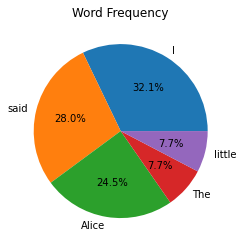

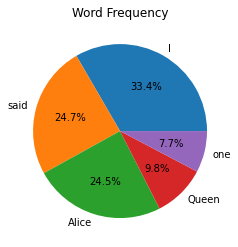

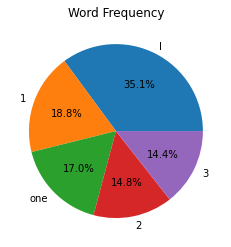

In [88]:
for t in range(len(texts)):
    bow = Counter(texts[t])
    labels, values = zip(*bow.most_common(5))
    plt.pie(values, labels=labels, autopct='%1.1f%%')
    plt.title("Word Frequency")
    plt.show()
    